Generate setigen signals that can then be put into seticore and used as part of clustering

blimpy.waterfall INFO     __write_to_hdf5_light: Writing the spectra matrix for et_signals/test.h5 without blobbing.
hdf5plugin._filters WARNING  Deprecation: hdf5plugin.Bitshuffle's lz4 argument is deprecated, use cname='lz4' or 'none' instead.
hdf5plugin._filters WARNING  Deprecation: hdf5plugin.Bitshuffle's lz4 argument is deprecated, use cname='lz4' or 'none' instead.


blimpy.waterfall INFO     Conversion time: 0.01sec


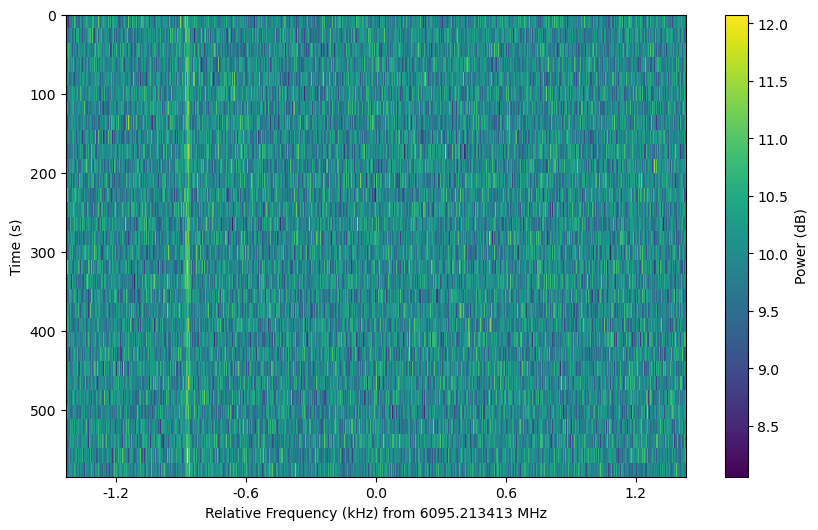

In [30]:
from astropy import units as u
import setigen as stg
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=10, noise_type='chi2')

signal = frame.add_constant_signal(f_start=frame.get_frequency(200),
                          drift_rate=np.random.randint(-2, 2)*u.Hz/u.s,
                          level=frame.get_intensity(snr=np.random.randint(10, 15)),
                          width=np.random.randint(20, 40)*u.Hz,
                          f_profile_type='sinc2')

fig = plt.figure(figsize=(10, 6))
frame.plot()
frame.save_h5('et_signals/test.h5')
plt.show()


--- File Info ---
DIMENSION_LABELS :   ['frequency' 'feed_id' 'time']
        az_start :                              0.0
       data_type :                                1
            fch1 :            8421.386717353016 MHz
            foff :      -2.7939677238464355e-06 MHz
           ibeam :                                1
      machine_id :                               20
          nbeams :                                1
           nbits :                               32
          nchans :                          1048576
            nifs :                                1
     rawdatafile : guppi_57650_67573_Voyager1_0002.0000.raw
     source_name :                         Voyager1
         src_dej :                       12:10:58.8
         src_raj :                     17:10:03.984
    telescope_id :                                6
           tsamp :                     18.253611008
   tstart (ISOT) :          2016-09-19T18:46:13.000
    tstart (MJD) :                576

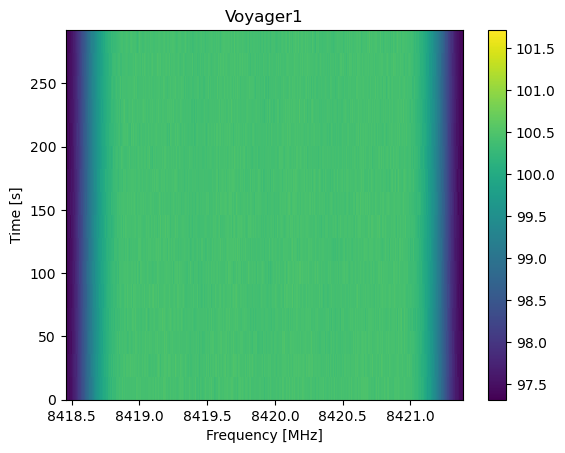

In [34]:
from blimpy import Waterfall

fb = Waterfall('et_signals/test_voyager.h5')
fb.info()
fb.plot_waterfall()

